In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from pathlib import Path

"""Define general plotting parameters"""
plt.rcParams['figure.dpi'] = 100
plt.rcParams.update({"text.usetex": False, 
                     "font.family": "serif",  
                     "mathtext.fontset": "stix", 
                     "font.size": 9, 
                     "axes.labelsize": 9, 
                     "legend.fontsize": 8, 
                     "xtick.labelsize": 8, 
                     "ytick.labelsize": 8})
pagewidth = 6.3 * 1.2
w_plot_s = pagewidth * 0.5
h_plot_s = w_plot_s / 1.6
w_plot_mw = pagewidth * 0.75
h_plot_mw = w_plot_mw / 1.6
w_plot_fw = pagewidth * 1.0
h_plot_fw = w_plot_fw / 1.6
markers = ['o', 's', '^', 'X', 'v', 'P', 'd', 'p', '<']
colors_d = ['#1f4e79', '#a83232', '#d4a017']
colors_blu = [
    '#14213d',  # oxford blue
    '#0f3057',  # midnight blue
    '#1f4e79',  # navy blue
    '#76b0e0',  # light blue
    '#8a7bc9',  # lavender / periwinkle
    '#4b0082']# indigo / deep purple
colors_l = ['#76b0e0', '#f0827f', '#f2d98c']

ModuleNotFoundError: No module named 'Isocont_post_process'

In [2]:
username = os.getlogin()
filepath = Path(f"C:/Users/{username}/OneDrive - ETH Zurich/Semester 10/Master Thesis/Mathematica Notebooks")
data_csv_dir = filepath / "curves.csv"
df =  pd.read_csv(data_csv_dir)


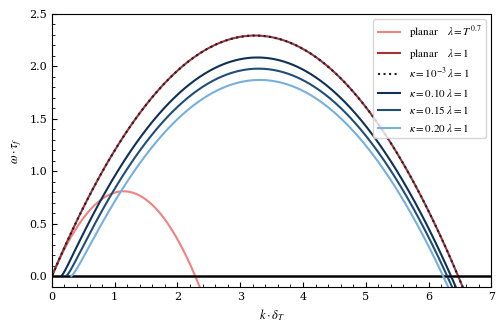

In [48]:
def plot_growth_exp(omega_list, k_list, labels, plot_dims=(w_plot_mw, h_plot_mw), colors=None, ax=None, k_min=0.0, linestyle='-'):
    """ Function to plot the growth exponents over the wavenumber to get the linear dispersion curve
    Input:
        omega_list:     list of arrays containing the growth exponents (array from get_growth_exponent(...))
        k_list:         list of arrays containing the mean wavenumbers
        labels:         list of lables for each run
        title:          str: title of plot
        The each entry in the lists should contain the results from one run, len(lists) = no. of runs, 
        The arrays omega and k must have the same length per run
    """
    ylims=(-0.1, 2.5)
    if colors is None:
        my_cmap = plt.get_cmap('viridis')
        vmin = 0 
        vmax = len(k_list) - 1
        colors = my_cmap(np.linspace(0, 1.0, len(k_list)))

    if ax is None:
        fig, ax = plt.subplots(figsize=plot_dims)
        
    # Check if there is a omega and k for each run
    if len(omega_list) != len(k_list):
        raise ValueError("shapes of omega and k does not match")

    # Initialize plot
    ax.axhline(0, color='black', linewidth=1)
    i = 0
    for omega, k in zip(omega_list, k_list):
        # filter data
        idx = np.argmax(np.array(k) == k_min)
        # plot actual values 
        if labels is None: ax.plot(k[idx:], omega[idx:], color=colors[i], linestyle=linestyle)
        else:              ax.plot(k[idx:], omega[idx:], label=labels[i], color=colors[i], linestyle=linestyle)
        # ax1.plot(k_spline, omega_interp, linestyle='--', c=colors[i], linewidth=0.8) 
        i += 1
        
    # Format the plot
    ax.set_xlabel(r'$k\cdot \delta_T$')
    ax.set_ylabel(r'$\omega \cdot \tau_f$')
    ax.set_xlim(left = 0, right= 7)
    ax.set_ylim(ylims)
    if labels is not None: ax.legend(loc="upper right")
    ax.tick_params(axis='both', which='both', labelcolor='black', direction='in')
    ax.minorticks_on()
    ax.grid(False, which='both')
    return ax

ax = plot_growth_exp([df['new_plane'].to_list()], [df['k'].to_list()], [r'$\text{planar} \quad \;   \lambda =T^{0.7} $'],
                     colors=[colors_l[1]])
ax = plot_growth_exp([df['old_plane'].to_list()], [df['k'].to_list()], [r'$\text{planar} \quad \; \lambda = 1 $'], 
                     colors=[colors_d[1]],ax=ax)
ax = plot_growth_exp([df['kappa=0.0'].to_list()], [df['k'].to_list()], [r'$\kappa = 10^{-3} \,\lambda =  1 $'], 
                     colors=[colors_blu[0]], ax=ax, k_min=0.01, linestyle=':')
ax = plot_growth_exp([df['kappa=0.1'].to_list()], [df['k'].to_list()], [r'$\kappa = 0.10  \;  \lambda = 1 $'],   
                     colors=[colors_blu[1]], ax=ax, k_min=0.16)
ax = plot_growth_exp([df['kappa=0.15'].to_list()], [df['k'].to_list()], [r'$\kappa = 0.15 \;  \lambda = 1 $'],   
                     colors=[colors_blu[2]], ax=ax, k_min=0.24)
ax = plot_growth_exp([df['kappa=0.2'].to_list()], [df['k'].to_list()], [r'$\kappa = 0.20  \;  \lambda = 1 $'],  
                     colors=[colors_blu[3]],ax=ax, k_min=0.31)

plt.savefig(f"C:/Users/{username}/OneDrive - ETH Zurich/Semester 10/Master Thesis/Report/Figures/Disp_rels/theo_comp.png",
            dpi=300,bbox_inches='tight')